# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [330]:
from IPython.display import display
import pandas as pd

df = pd.read_csv('advertising.csv')
display(df)

# Limpeza de Dados

display(df.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

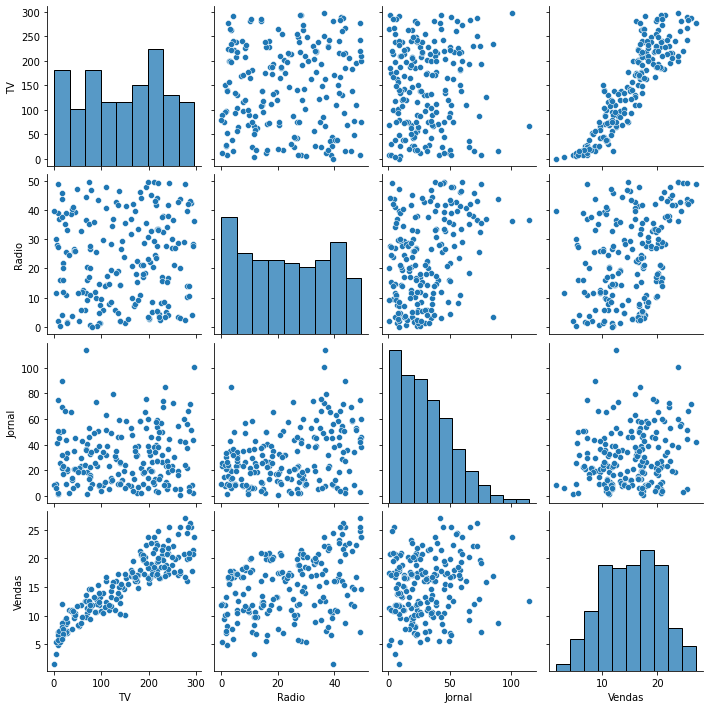

In [331]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

Este gráfico não me pareceu muito esclarecedor. Vamos a outro exemplo.

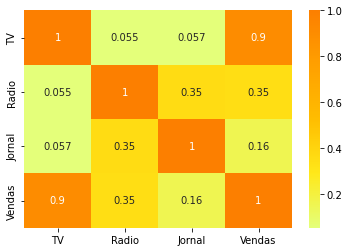

In [332]:
sns.heatmap(df.corr(), cmap='Wistia', annot=True)
plt.show()

##### Conclusão:
Os melhores investimentos são TV e Rádio, mas apenas TV(que está acima de 0.5 == 50%) tem equação matemática positiva.

Parece-me que a quantidade de investimento em TV está diretamente relacionada a quantidade de Milhões em Vendas.

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [333]:
from sklearn.model_selection import train_test_split

# X é o valor que você irá usar para fazer a previsão
# Y é o valor que você quer prever

x = df[['TV', 'Radio', 'Jornal']] # df.drop('Vendas', axis=1)
y = df['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # random_State=1 => Valor seed do aleatório

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [334]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Criação da IA
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor()

# Treino da IA
lin_reg.fit(x_train, y_train)
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [335]:
# Identificando a IA com melhores resultados
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
r2_rf = metrics.r2_score(y_test, test_pred_rf)

print(f'R² da Regressão Linear: {r2_lin}')
print(f'R² da Random Forest: {r2_rf}')

R² da Regressão Linear: 0.831880990119034
R² da Random Forest: 0.931487321344003


#### Visualização Gráfica das Previsões

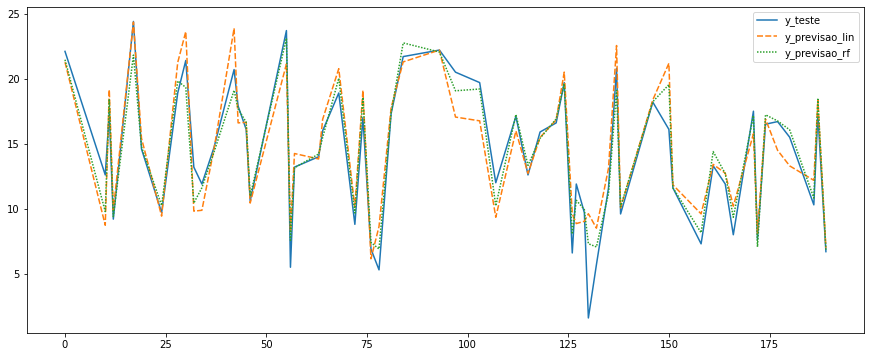

In [336]:
# O melhor modelo é o RandomForest
df_resultado = pd.DataFrame()

df_resultado['y_teste'] = y_test
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado['y_previsao_rf'] = test_pred_rf

plt.figure(figsize=(15, 6))
sns.lineplot(data=df_resultado)
plt.show()

#### Como fazer uma nova previsão?

In [347]:
# importar nova tabela com as informações de propaganda em TV, Radio e Jornal
# passa a nova tabela para o predict do seu modelo

new_df = pd.read_csv('novos.csv')
display(new_df)
previsao = rf_reg.predict(new_df).round(1) # Apenas uma casa decimal
print(previsao)
new_df['Previsao Vendas'] = previsao
display(new_df)
new_df.to_csv('novos previsao.csv', index=False)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.1  8.4 20.6]


,TV,Radio,Jornal,Previsao Vendas
0,23.1,3.8,69.2,7.1
1,44.5,0.0,5.1,8.4
2,170.2,45.9,0.0,20.6


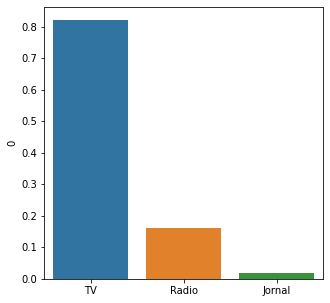

In [348]:
importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize=(5, 5))
sns.barplot(x=importancia_features.index, y=importancia_features[0])
plt.show()